# <center>Learning how to play Space Invaders with RL.</center>

![space invaders poster image](https://cdn-images-1.medium.com/max/1200/1*Ya6drllhmC82yh0J-elrPA.jpeg)

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10908051389773916208
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3280797696
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18347978298941703562
physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
import gym
import numpy as np
from dqn.model import Model
from dqn.train import Train 
import matplotlib.pyplot as plt

from gym.wrappers.atari_preprocessing import AtariPreprocessing
from baselines.common.atari_wrappers import NoopResetEnv, MaxAndSkipEnv, wrap_deepmind

ModuleNotFoundError: No module named 'utils'

In [3]:
env = gym.make('SpaceInvaders-v0')

env = NoopResetEnv(env)
env = MaxAndSkipEnv(env)
env = wrap_deepmind(env, episode_life=False, clip_rewards=True, frame_stack=True, scale=False)

**Observation space**: the observation space consists on 3 sequential images of size 210x160

**Action space**: there are 6 possible actions: *left, right, shoot, left-shoot, right-shoot, do nothing*.

In [4]:
print(env.observation_space.shape)
print(env.action_space)

(84, 84, 4)
Discrete(6)


### Agent acting randomly

In [5]:
# Example of how env works
total_reward = 0
env.reset()
while True:
    env.render()
    next_state, reward, done, info = env.step((env.action_space.sample())) # select random action
    total_reward += reward
    if done:
        print(total_reward)
        break
        
env.close()

10.0


### State sequence

Each state will look like a sequence of 4 frames. Every frame is cropped and preprocessed for faster and more efficient computations.

(4, 84, 84)


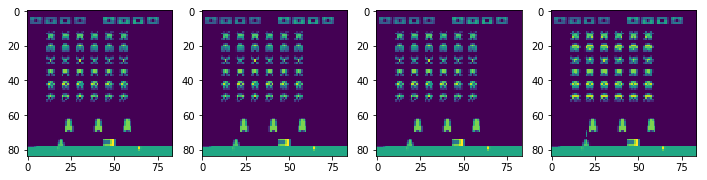

In [7]:
env.reset()

# Create a new state
next_state, reward, done, info = env.step((env.action_space.sample())) # select random action

print(np.asarray(next_state).transpose(2, 0, 1).shape)
# Plot the state
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
ax = axes.ravel()

for i, frame in enumerate(np.asarray(next_state).transpose(2, 0, 1)):
    ax[i].imshow(frame)

### Establishing a benchmark

I'll be using two benchmarks:
* The performance of an agent without training over 60 games
* The performance of a human

episode: 10, score: 10.0: 100%|██████████| 10/10 [00:03<00:00,  3.04it/s]


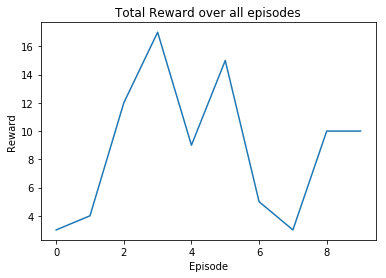

In [8]:
episodes_eval = 10
benchmark = Train(env, episodes_eval, k_frames=4)

# Evaluate performance
benchmark.train(learn=False, render=False)

# Plot rewards
benchmark.plot_rewards()

## Training

In [9]:
episodes_train = 1000

train = Train(env, episodes=episodes_train, k_frames=4)

# Train the agent
train.train(learn=True, render=False)

# Plot rewards
train.plot_rewards()

episode: 27, score: 11.0:   3%|▎         | 26/1000 [00:37<19:59,  1.23s/it]

KeyboardInterrupt: 